In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
NHAMCS = pd.read_sas(filepath_or_buffer = '/content/drive/Shared drives/Vodafone Internship/Dataset/ed2017_sas.sas7bdat')
NHAMCS


,VMONTH,VDAYR,ARRTIME,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,ETHUN,ETHIM,RACEUN,RACER,RACERETH,ARREMS,AMBTRANSFER,NOPAY,PAYPRIV,PAYMCARE,PAYMCAID,PAYWKCMP,PAYSELF,PAYNOCHG,PAYOTH,PAYDK,PAYTYPER,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,IMMEDR,PAINSCALE,SEEN72,RFV1,RFV2,RFV3,RFV4,...,RX29CAT3,RX29CAT4,RX29V1C1,RX29V1C2,RX29V1C3,RX29V1C4,RX29V2C1,RX29V2C2,RX29V2C3,RX29V2C4,RX29V3C1,RX29V3C2,RX29V3C3,RX29V3C4,DRUGID30,PRESCR30,CONTSUB30,COMSTAT30,RX30CAT1,RX30CAT2,RX30CAT3,RX30CAT4,RX30V1C1,RX30V1C2,RX30V1C3,RX30V1C4,RX30V2C1,RX30V2C2,RX30V2C3,RX30V2C4,RX30V3C1,RX30V3C2,RX30V3C3,RX30V3C4,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
0,6.0,6.0,b'2056',72.0,NaN,27.0,3.0,-7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,-7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,982.0,72.0,16.0,124.0,74.0,100.0,4.0,5.0,2.0,52200.0,-9.0,-9.0,-9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,21.58043
1,6.0,2.0,b'1417',64.0,NaN,1.0,1.0,-7.0,1.0,1.0,1.0,1.0,-9.0,1.0,3.0,2.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1014.0,151.0,24.0,-9.0,-9.0,98.0,4.0,-8.0,2.0,14400.0,10100.0,-9.0,-9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
2,6.0,2.0,b'2303',-7.0,NaN,52.0,4.0,-7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,-7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,973.0,124.0,16.0,100.0,60.0,98.0,3.0,-9.0,2.0,15451.0,-9.0,-9.0,-9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
3,6.0,5.0,b'0930',29.0,NaN,5.0,1.0,-7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,-7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,983.0,81.0,22.0,-9.0,-9.0,99.0,4.0,-8.0,2.0,14400.0,-9.0,-9.0,-9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
4,6.0,2.0,b'1332',20.0,NaN,4.0,1.0,-7.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,976.0,98.0,20.0,107.0,56.0,98.0,4.0,-9.0,2.0,55700.0,-9.0,-9.0,-9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40100000.0,4.0,3723.12641,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16704,7.0,7.0,b'0328',8.0,NaN,24.0,2.0,-7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,-7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,970.0,87.0,18.0,146.0,87.0,100.0,3.0,10.0,2.0,10552.0,10550.0,17151.0,15250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40200000.0,10.0,30903.80174,NaN
16705,8.0,1.0,b'1707',23.0,NaN,36.0,3.0,-7.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,-7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,976.0,100.0,20.0,113.0,80.0,99.0,3.0,8.0,2.0,10550.0,19101.0,27050.0,16750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40200000.0,10.0,30903.80174,NaN
16706,7.0,4.0,b'1230',96.0,NaN,40.0,3.0,-7.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,-7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,971.0,89.0,20.0,145.0,84.0,97.0,3.0,3.0,2.0,10553.0,15453.0,42000.0,41150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2017.0,40200000.0,10.0,30903.80174,NaN
16707,7.0,1.0,b'0235',33.0,NaN,75.0,6.0,-7.0,1.0,1.0,

In [1]:
for col in NHAMCS.columns: 
    print(col) 

NameError: ignored

In [5]:
patID = NHAMCS[['PATCODE']]
demographics = NHAMCS[['AGE', 'AGER', 'AGEDAYS', 'SEX', 'PATWT']]

visit = NHAMCS[['WAITTIME', 'PAINSCALE', 'SEEN72', 'TOTDIAG']]

causes = NHAMCS[['CAUSE1', 'CAUSE2', 'CAUSE3']]

diagnoses = NHAMCS[['DIAG1', 'DIAG2', 'DIAG3', 'DIAG4']]
diagnosesProbable = NHAMCS[['PRDIAG1', 'PRDIAG2', 'PRDIAG3', 'PRDIAG4']]

patientComplaintsDetailed = NHAMCS[['RFV1', 'RFV2', 'RFV3', 'RFV4']]
patientComplaintsBroad = NHAMCS[['RFV13D', 'RFV23D', 'RFV33D', 'RFV43D']]

injuryData = NHAMCS[['INJURY', 'INJPOISAD', 'INJURY72', 'INTENT15', 'INJURY_ENC']]

vitals = NHAMCS[['VITALSD', 'TEMPDF', 'PULSED', 'RESPRD', 'BPSYSD', 'BPDIASD']]

previousDiseases = NHAMCS[['ETOHAB' ,'ALZHD','ASTHMA','CANCER','CEBVD','CKD','COPD','CHF','CAD',
                           'DEPRN','DIABTYP1','DIABTYP2','DIABTYP0','ESRD','HPE','EDHIV','HYPLIPID','HTN',
                           'OBESITY' ,'OSA' ,'OSTPRSIS', 'SUBSTAB', 'NOCHRON','TOTCHRON']]

blood = NHAMCS[['ABG','BAC','BMP','BNP','BUNCREAT','CARDENZ','CBC','CMP','BLOODCX',
                'TRTCX','URINECX','WOUNDCX','OTHCX','DDIMER','ELECTROL','GLUCOSE','LACTATE','LFT','PTTINR','OTHERBLD','CARDMON',
                'EKG','HIVTEST','FLUTEST','PREGTEST','TOXSCREN','URINE']]

imaging = NHAMCS[['ANYIMAGE','XRAY','CATSCAN','CTCONTRAST','CTAB','CTCHEST','CTHEAD','CTOTHER','CTUNK','MRI','MRICONTRAST','ULTRASND','OTHIMAGE']]

medications = NHAMCS[['MED1','MED2','MED3','MED4','MED5','MED6','MED7','MED8','MED9','MED10',
                      'MED11','MED12','MED13','MED14','MED15','MED16','MED17','MED18','MED19',
                      'MED20','MED21','MED22','MED23','MED24','MED25','MED26','MED27','MED28','MED29','MED30']]

ERMedications = NHAMCS[['GPMED1','GPMED2','GPMED3','GPMED4','GPMED5','GPMED6','GPMED7','GPMED8','GPMED9','GPMED10',
                        'GPMED11','GPMED12','GPMED13','GPMED14','GPMED15','GPMED16','GPMED17','GPMED18','GPMED19',
                        'GPMED20','GPMED21','GPMED22','GPMED23','GPMED24','GPMED25','GPMED26','GPMED27','GPMED28','GPMED29','GPMED30']]

immediacyLevel = NHAMCS[['IMMEDR']]

usefulData = pd.concat([patID, demographics, visit, causes, diagnoses, diagnosesProbable, patientComplaintsDetailed, patientComplaintsBroad, injuryData, 
                        vitals, previousDiseases, blood, imaging, medications, ERMedications, immediacyLevel], axis=1)

In [6]:
import numpy as np
c = usefulData.corr()
c = c.fillna(0)

c[c < 0.05] = 0

corrWithLabel = c['IMMEDR']

for col in c.columns:
  if(corrWithLabel.loc[col] != 0):
    print(col, str(corrWithLabel.loc[col]))

PAINSCALE 0.21050143681383632
SEEN72 0.1314682426957202
RFV2 0.07298961756794864
RFV3 0.07938700790544993
RFV4 0.0795402421156672
RFV23D 0.07298061153719283
RFV33D 0.0793767952317221
RFV43D 0.07953323194781706
INJURY 0.08932681411368822
INJPOISAD 0.05473720477775984
PULSED 0.09006311281074812
RESPRD 0.0837511586804329
BPSYSD 0.07673436832471882
BPDIASD 0.07483402394854714
GPMED1 0.06924976761359627
IMMEDR 1.0


In [7]:
import numpy as np
c = NHAMCS.corr()
c = c.fillna(0)

c[c < 0.1] = 0

corrWithLabel = c['IMMEDR']

for col in c.columns:
  if(corrWithLabel.loc[col] != 0):
    print(col, str(corrWithLabel.loc[col]))

TEMPF 0.14223143338411054
PULSE 0.10655904063934311
RESPR 0.12280191813089095
POPCT 0.13195478851497852
IMMEDR 1.0
PAINSCALE 0.21050143681383632
SEEN72 0.1314682426957202
EMRED 0.1224316663752014
EHRINSE 0.10554440986738609
EDEMOGER 0.12357259052823502
EPROLSTER 0.1363007426689291
EPNOTESER 0.1342576387813558
EMEDALGER 0.13084821101255353
ECPOEER 0.1023592482724919
ECONTR 0.18310947654207838
ECTOEER 0.13084821101255353
ERESULTER 0.1331077272096618
ERADIER 0.13084821101255353
EDINFO 0.14978489988609947
AMBDIV 0.18678701565967862
INCSHX 0.14633249494162362
EXPSPACE 0.14419411998307774
CATRIAGE 0.10711645264265217
IMBED 0.1595465907072153
ADVTRIAG 0.1435246780076956
PHYSPRACTRIA 0.11553755196878712
FASTTRAK 0.105745734698495
EDPTOR 0.1537725316245249
DASHBORD 0.1126299730297916
RFID 0.19457534708177576
WIRELESS 0.1006755594891352
POOLNURS 0.18446463947329042
BEDDATA 0.11380990429223725
PRESCR16 0.19494029394044318
PRESCR17 0.16807524133703441
PRESCR19 0.2484729200794421
COMSTAT19 0.105535

RFV1      0.0
RFV2      0.0
RFV3      0.0
RFV4      0.0
IMMEDR    1.0
Name: IMMEDR, dtype: float64


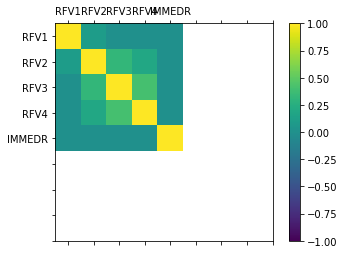

In [8]:
import matplotlib.pyplot as plt
import numpy

test1 = pd.concat([patientComplaintsDetailed, immediacyLevel], axis = 1)
correlations = test1.corr()
correlations[correlations < 0.1] = 0
withLabel = correlations['IMMEDR']
print(withLabel)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(test1.columns)
ax.set_yticklabels(test1.columns)
plt.show()

In [9]:
print(diagnoses.head())
NHAMCS[['PATCODE']]

     DIAG1  DIAG2  DIAG3  DIAG4
0  b'S810'  b'-9'  b'-9'  b'-9'
1  b'J209'  b'-9'  b'-9'  b'-9'
2  b'ZZZ1'  b'-9'  b'-9'  b'-9'
3  b'J050'  b'-9'  b'-9'  b'-9'
4  b'S672'  b'-9'  b'-9'  b'-9'


,PATCODE
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
...,...
16704,43.0
16705,44.0
16706,45.0
16707,46.0


In [10]:

print(NHAMCS.head())

   VMONTH  VDAYR  ARRTIME  WAITTIME  ...     CSTRATM  CPSUM       PATWT      EDWT
0     6.0    6.0  b'2056'      72.0  ...  40100000.0    4.0  3723.12641  21.58043
1     6.0    2.0  b'1417'      64.0  ...  40100000.0    4.0  3723.12641       NaN
2     6.0    2.0  b'2303'      -7.0  ...  40100000.0    4.0  3723.12641       NaN
3     6.0    5.0  b'0930'      29.0  ...  40100000.0    4.0  3723.12641       NaN
4     6.0    2.0  b'1332'      20.0  ...  40100000.0    4.0  3723.12641       NaN

[5 rows x 949 columns]


In [11]:
NHAMCS.describe()

,VMONTH,VDAYR,WAITTIME,BLANK1,AGE,AGER,AGEDAYS,RESIDNCE,SEX,ETHUN,ETHIM,RACEUN,RACER,RACERETH,ARREMS,AMBTRANSFER,NOPAY,PAYPRIV,PAYMCARE,PAYMCAID,PAYWKCMP,PAYSELF,PAYNOCHG,PAYOTH,PAYDK,PAYTYPER,TEMPF,PULSE,RESPR,BPSYS,BPDIAS,POPCT,IMMEDR,PAINSCALE,SEEN72,RFV1,RFV2,RFV3,RFV4,RFV5,...,COMSTAT19,PRESCR20,CONTSUB20,COMSTAT20,PRESCR21,CONTSUB21,COMSTAT21,PRESCR22,CONTSUB22,COMSTAT22,PRESCR23,CONTSUB23,COMSTAT23,PRESCR24,CONTSUB24,COMSTAT24,PRESCR25,CONTSUB25,COMSTAT25,PRESCR26,CONTSUB26,COMSTAT26,PRESCR27,CONTSUB27,COMSTAT27,PRESCR28,CONTSUB28,COMSTAT28,PRESCR29,CONTSUB29,COMSTAT29,PRESCR30,CONTSUB30,COMSTAT30,SETTYPE,YEAR,CSTRATM,CPSUM,PATWT,EDWT
count,16709.000000,16709.000000,16709.000000,0.0,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,16709.000000,...,58.000000,48.00000,48.000000,48.000000,39.000000,39.000000,39.000000,33.000000,33.000000,33.000000,21.000000,21.000000,21.000000,16.000000,16.00000,16.000,12.000000,12.000000,12.0,8.000000,8.000000,8.0,6.000000,6.000000,6.000000,2.0,2.00000,2.0,1.0,1.0,1.0,1.0,1.0,1.0,16709.0,16709.0,1.670900e+04,16709.000000,16709.000000,203.000000
mean,6.125681,3.930516,29.794542,NaN,37.346101,3.082471,-1.596026,0.881740,1.452391,-0.421509,1.851996,-0.528099,1.352564,1.668322,1.533186,-5.868394,0.017416,0.327309,0.177808,0.396433,0.009636,0.079358,0.011910,0.040098,0.085283,1.399246,926.590999,87.539171,18.276797,117.366748,68.417799,90.961219,0.963373,0.311688,1.225148,23043.382668,14363.604525,8549.979113,4833.868394,2553.690706,...,1.034483,2.00000,5.729167,1.062500,2.153846,5.897436,1.051282,2.121212,5.818182,1.060606,1.761905,5.714286,1.142857,2.500000,5.93750,1.125,2.000000,5.666667,1.0,2.500000,5.500000,1.0,1.833333,5.166667,1.166667,1.0,4.50000,1.0,1.0,6.0,1.0,1.0,6.0,1.0,3.0,2017.0,3.141847e+07,44307.324855,8317.515108,25.527016
std,3.608223,1.974707,62.091299,NaN,24.144383,1.480347,36.303924,1.402363,0.497743,4.421287,0.355115,4.083783,0.558631,0.866676,1.779012,3.058166,0.130818,0.469245,0.382363,0.489171,0.097690,0.270305,0.108483,0.196195,0.279311,3.479751,230.700489,40.394520,9.149415,50.417758,31.016720,25.911618,4.860845,6.798058,2.644495,16504.835395,15931.961598,13753.553330,11157.539397,8579.222702,...,0.184059,1.75038,1.026035,0.244623,1.814249,0.640513,0.223456,1.798568,0.768706,0.242306,1.609496,0.956183,0.358569,1.825742,0.57373,0.500,1.809068,0.778499,0.0,2.070197,1.414214,0.0,1.602082,1.602082,0.408248,0.0,2.12132,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,9.931761e+06,49708.971239,8226.613722,26.139377
min,1.000000,1.000000,-9.000000,NaN,0.000000,1.000000,-7.000000,-9.000000,1.000000,-9.000000,1.000000,-9.000000,1.000000,1.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,4.00000,1.000,1.000000,4.000000,1.0,1.000000,2.000000,1.0,1.000000,2.000000,1.000000,1.0,3.00000,1.0,1.0,6.0,1.0,1.0,6.0,1.0,3.0,2017.0,2.011720e+07,1.000000,104.458460,2.096910
25%,3.000000,2.000000,3.000000,NaN,19.000000,2.000000,-7.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,977.000000,74.000000,16.000000,111.000000,64.000000,96.000000,2.000000,-8.000000,2.000000,12300.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,1.000000,1.00000,6.000

In [12]:
print(NHAMCS.dtypes)

VMONTH      float64
VDAYR       float64
ARRTIME      object
WAITTIME    float64
BLANK1      float64
             ...   
YEAR        float64
CSTRATM     float64
CPSUM       float64
PATWT       float64
EDWT        float64
Length: 949, dtype: object


In [13]:
!pip install mpld3
import mpld3
%matplotlib inline
mpld3.enable_notebook()

     |████████████████████████████████| 1.0MB 2.8MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.1-cp36-none-any.whl size=364064 sha256=1e1b2dfe6429518a08b7ff651a6d0d82c1f60e77215ac054d4f84b3216acdf36
  Stored in directory: /root/.cache/pip/wheels/38/68/06/d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


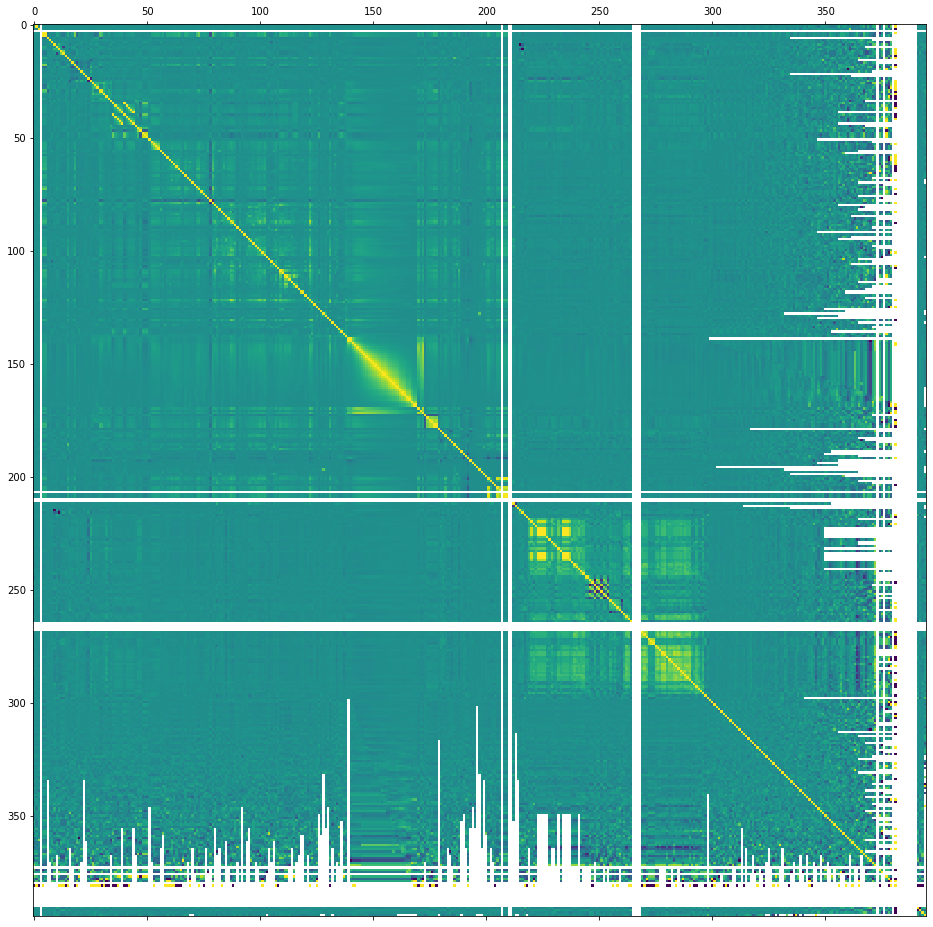

In [14]:
import matplotlib


matplotlib.rcParams['figure.figsize'] = [800, 800]
plt.matshow(NHAMCS.corr())
plt.show()

In [ ]:
import seaborn as sns; sns.set()

sns.heatmap(NHAMCS.corr(), annot=True, fmt="g", cmap='viridis')
vvvvvvvvvvvvv

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Diseases, Diagnosis, and Medications**

The purpose of the following batch of manually selected features is to examine how the medical history of patients along with the medications they take may influence the immediacy of response. 

In [ ]:
previousDiseases = NHAMCS[['ETOHAB' ,'ALZHD','ASTHMA','CANCER','CEBVD','CKD','COPD','CHF','CAD',
                           'DEPRN','DIABTYP1','DIABTYP2','DIABTYP0','ESRD','HPE','EDHIV','HYPLIPID','HTN',
                           'OBESITY' ,'OSA' ,'OSTPRSIS', 'SUBSTAB', 'NOCHRON','TOTCHRON']]

blood = NHAMCS[['ABG','BAC','BMP','BNP','BUNCREAT','CARDENZ','CBC','CMP','BLOODCX',
                'TRTCX','URINECX','WOUNDCX','OTHCX','DDIMER','ELECTROL','GLUCOSE','LACTATE','LFT','PTTINR','OTHERBLD','CARDMON',
                'EKG','HIVTEST','FLUTEST','PREGTEST','TOXSCREN','URINE']]

imaging = NHAMCS[['ANYIMAGE','XRAY','CATSCAN','CTCONTRAST','CTAB','CTCHEST','CTHEAD','CTOTHER','CTUNK','MRI','MRICONTRAST','ULTRASND','OTHIMAGE']]

medications = NHAMCS[['MED1','MED2','MED3','MED4','MED5','MED6','MED7','MED8','MED9','MED10',
                      'MED11','MED12','MED13','MED14','MED15','MED16','MED17','MED18','MED19',
                      'MED20','MED21','MED22','MED23','MED24','MED25','MED26','MED27','MED28','MED29','MED30']]

ERMedications = NHAMCS[['GPMED1','GPMED2','GPMED3','GPMED4','GPMED5','GPMED6','GPMED7','GPMED8','GPMED9','GPMED10',
                        'GPMED11','GPMED12','GPMED13','GPMED14','GPMED15','GPMED16','GPMED17','GPMED18','GPMED19',
                        'GPMED20','GPMED21','GPMED22','GPMED23','GPMED24','GPMED25','GPMED26','GPMED27','GPMED28','GPMED29','GPMED30']]

immediacyLevel = NHAMCS[['IMMEDR']]